In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import rcParams



In [68]:
housing = pd.read_csv('train_interim.csv')

In [69]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,12,2008,WD,Normal,250000


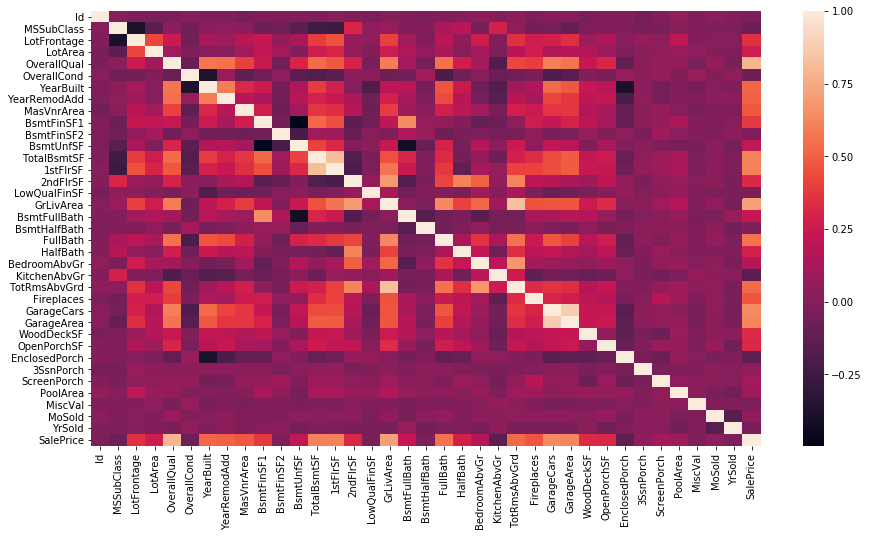

In [70]:
plt.figure(figsize=(15,8))
corr = housing.corr(method="pearson")
g = sns.heatmap(corr)
plt.show()

In [71]:
# L =[]
# for col in list(housing.columns.values)[1:len(housing.columns)-1]:
#     temp = housing['SalePrice'].corr(housing[col])
#     L.append((col,temp))

# L

In [72]:
corr = housing.corr(method="pearson")
corrSalesPrice = corr['SalePrice'][1:]

In [89]:
type(corrSalesPrice)
a = corr['SalePrice'][1:]


36

In [74]:
corrSalesPrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

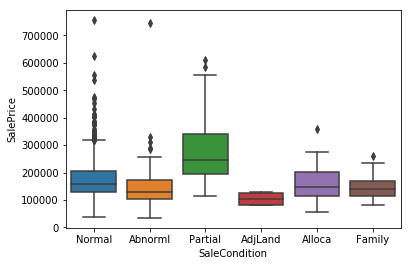

In [136]:
#np.issubdtype(housing['Alley'].dtype, np.number)
sns.boxplot(x=col, y="SalePrice", data=housing)

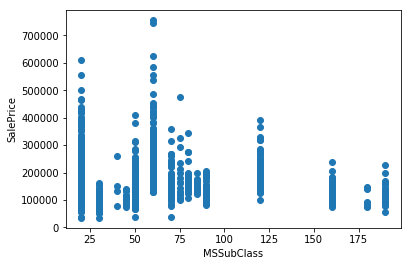

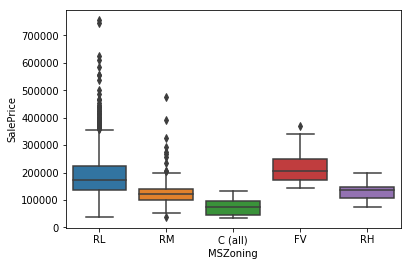

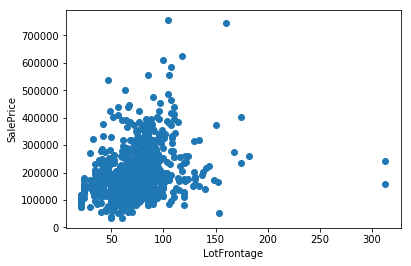

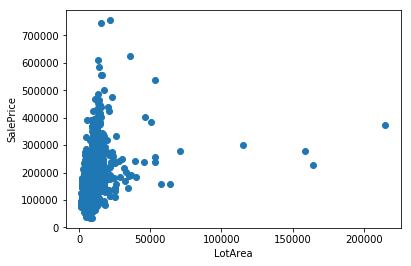

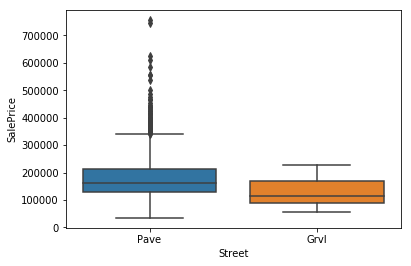

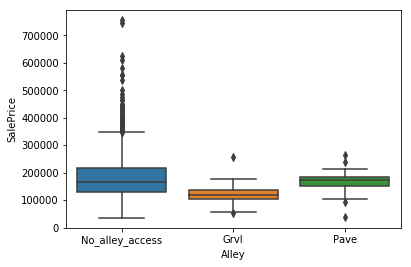

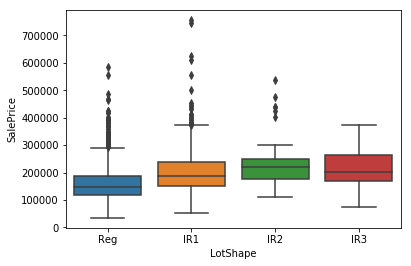

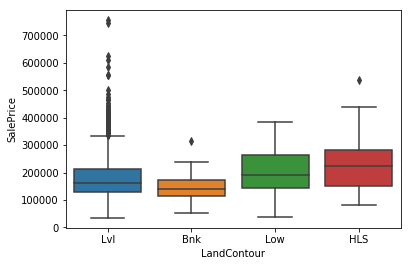

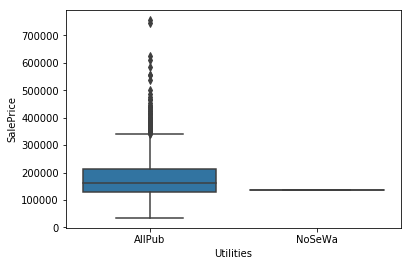

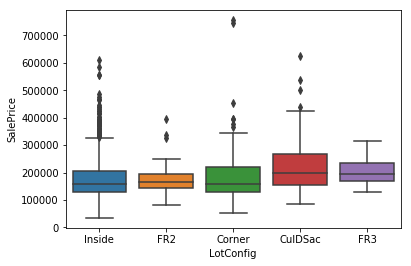

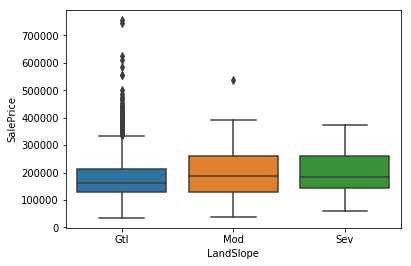

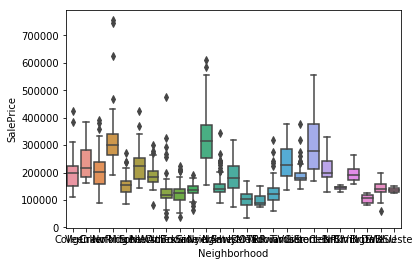

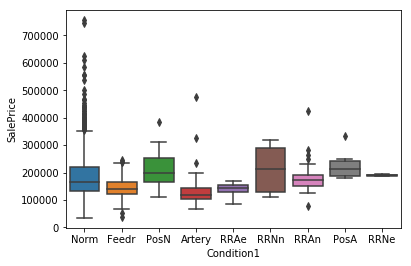

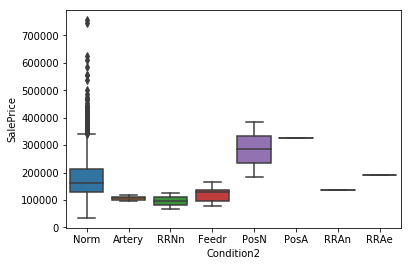

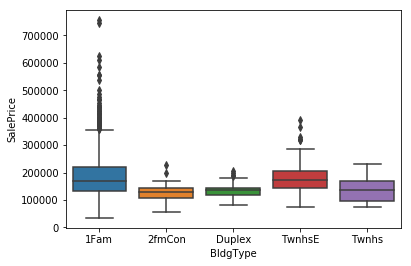

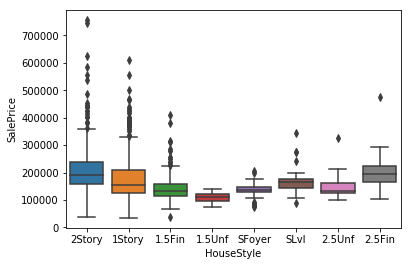

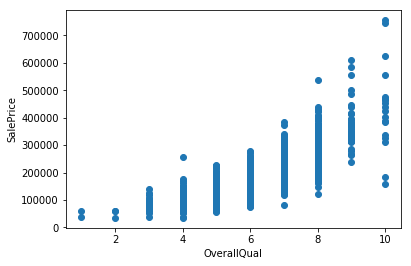

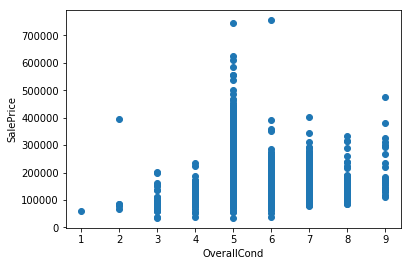

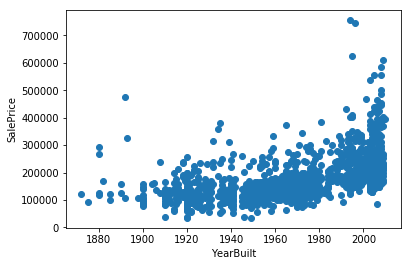

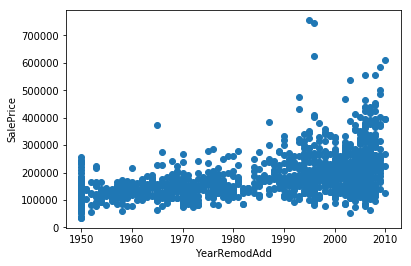

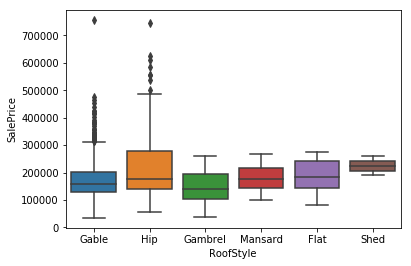

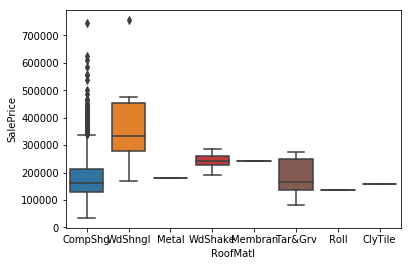

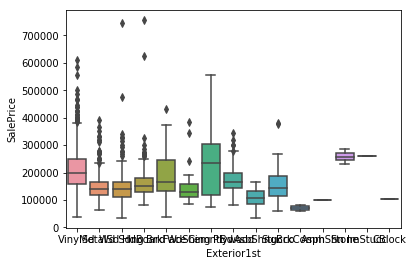

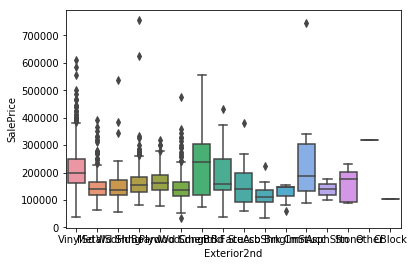

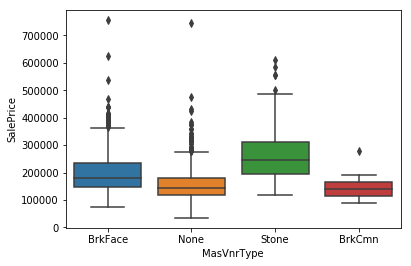

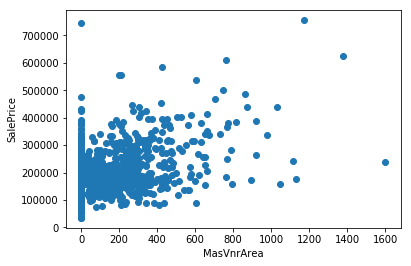

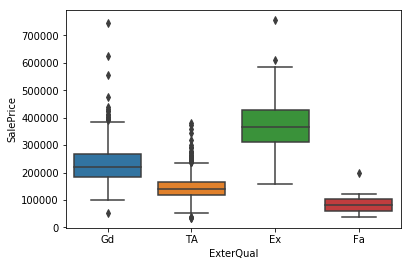

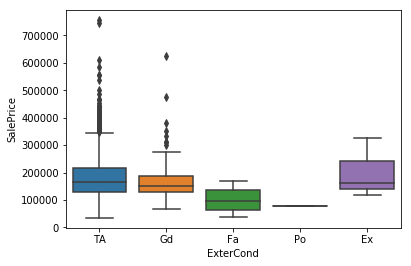

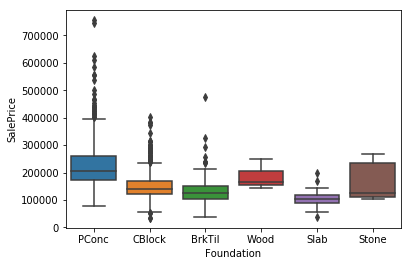

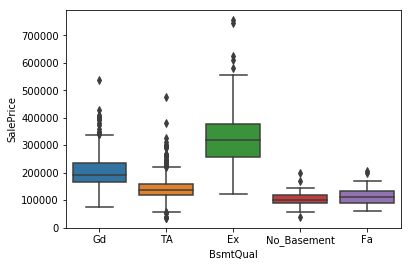

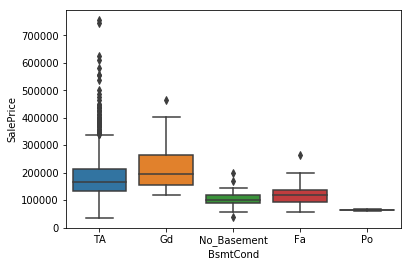

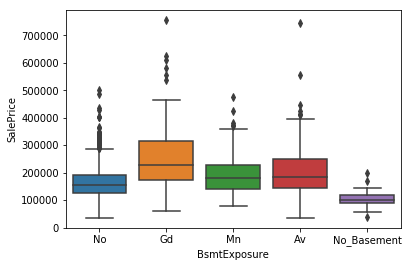

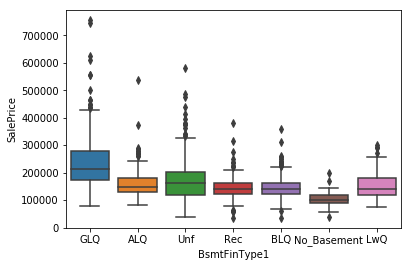

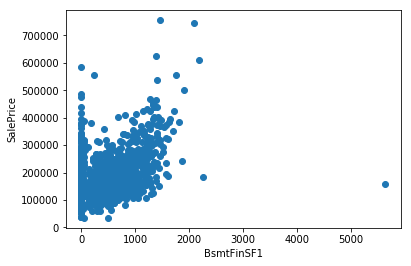

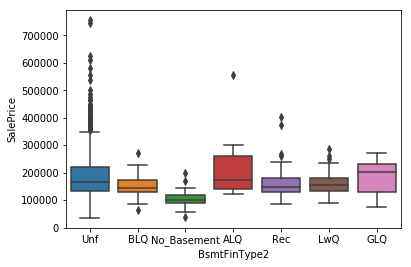

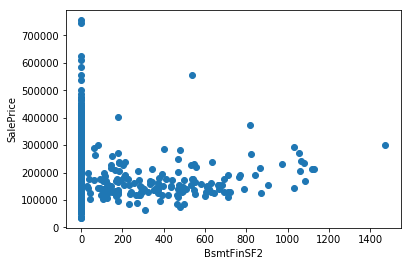

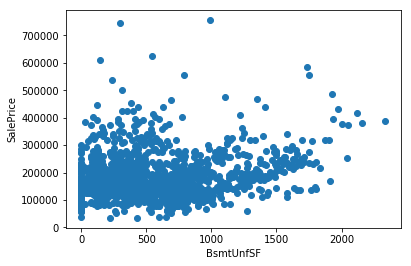

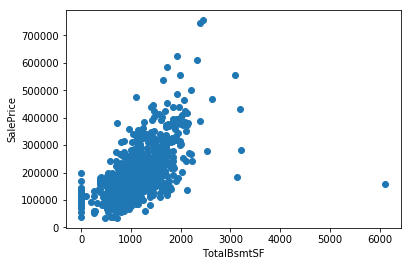

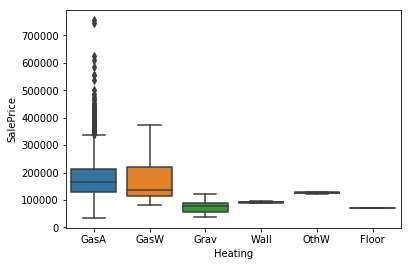

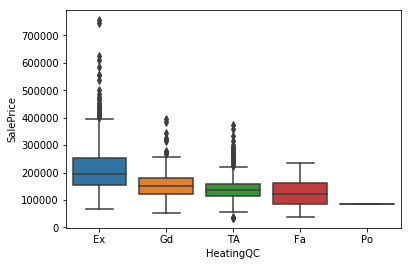

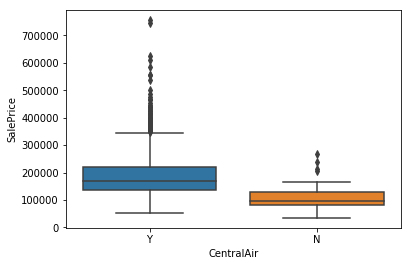

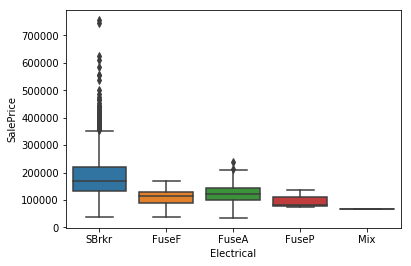

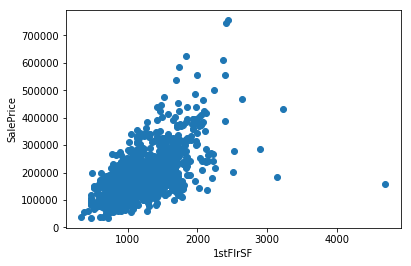

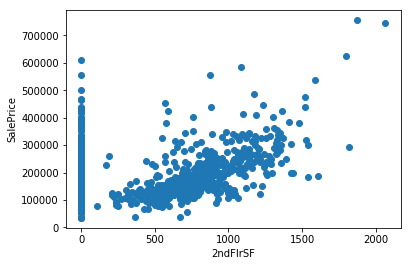

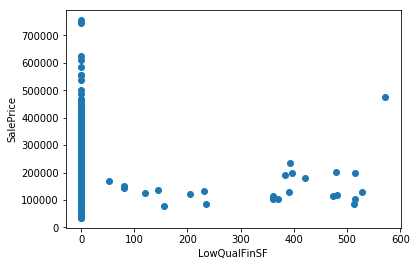

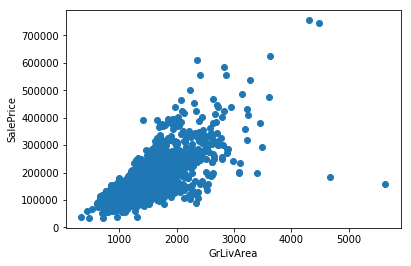

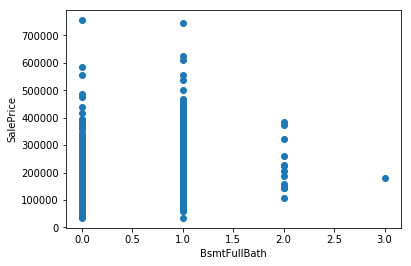

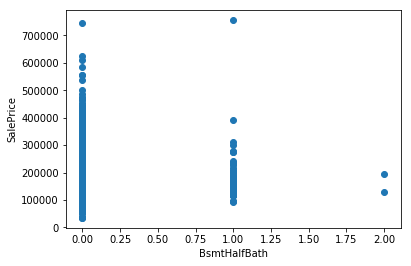

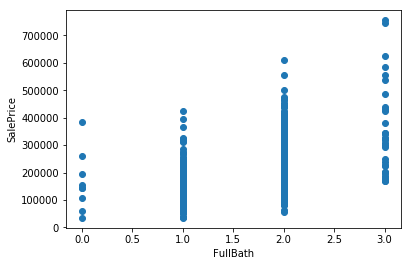

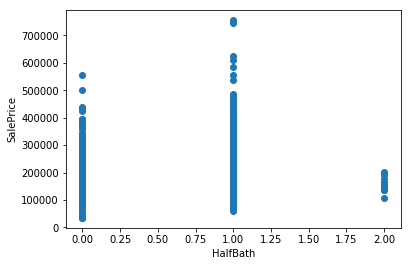

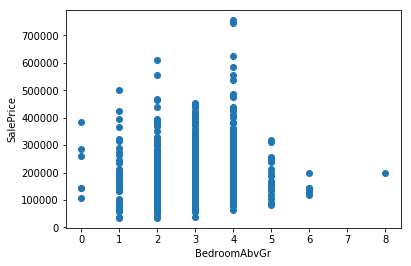

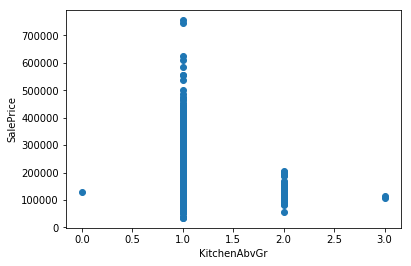

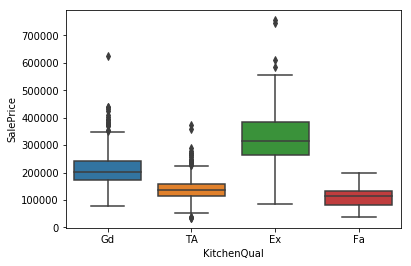

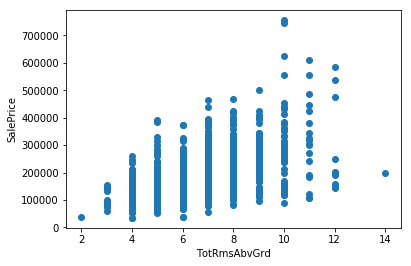

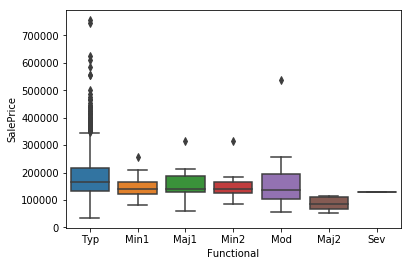

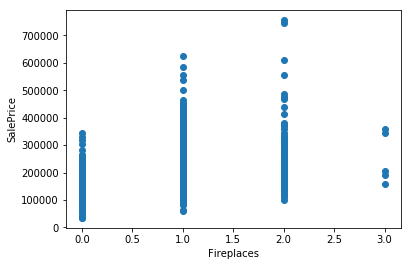

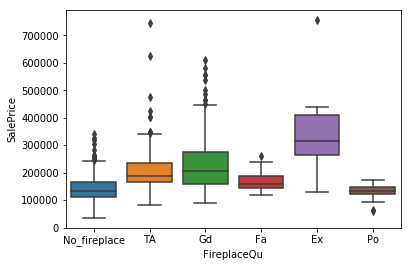

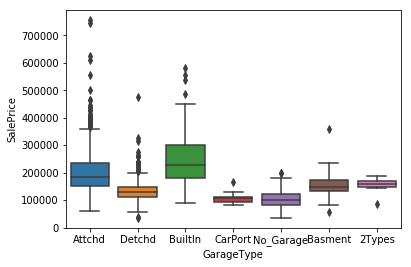

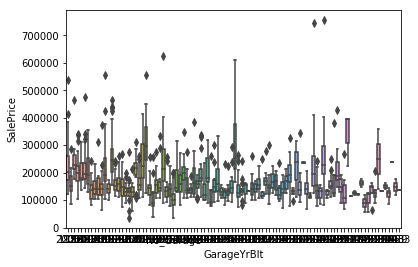

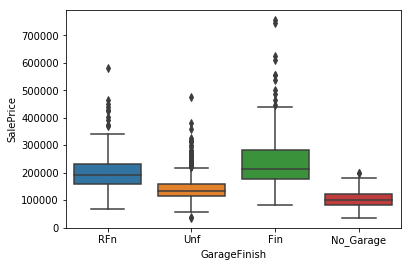

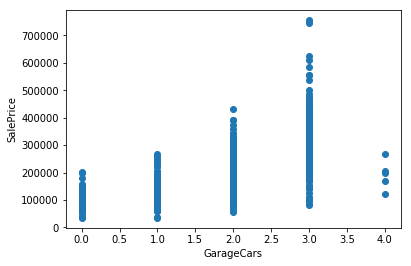

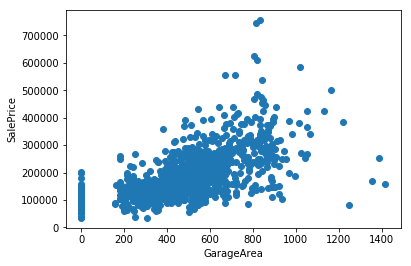

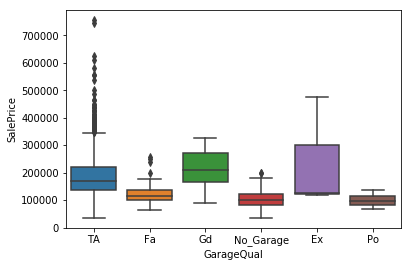

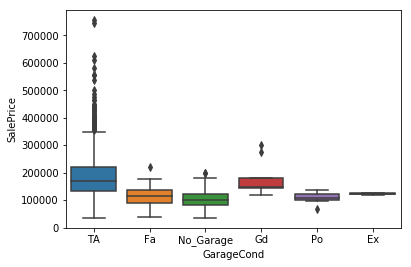

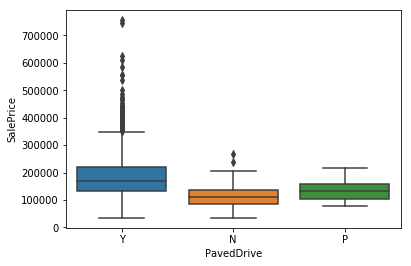

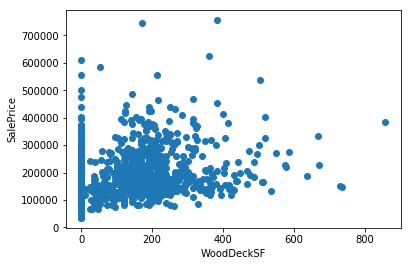

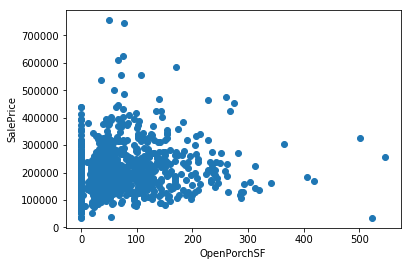

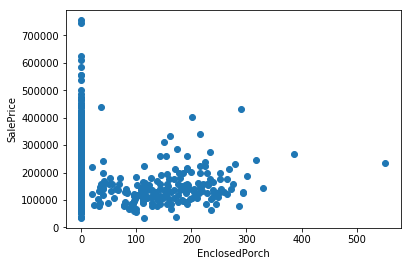

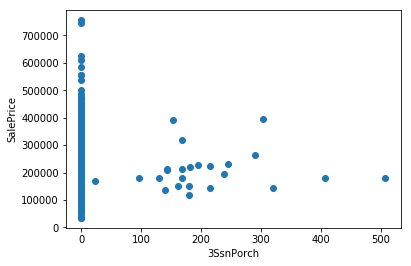

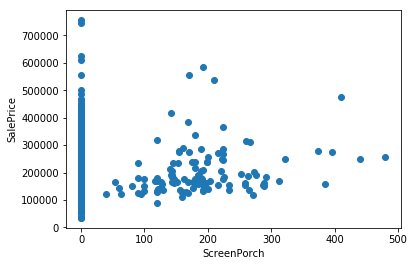

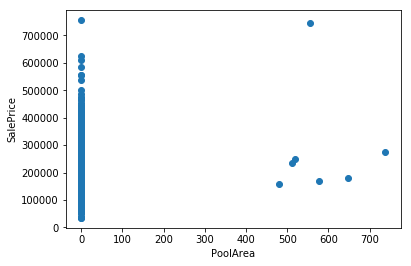

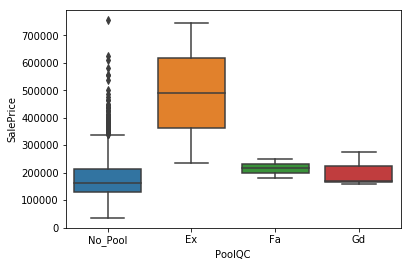

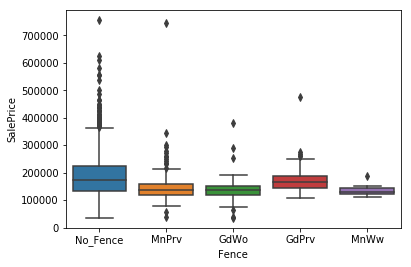

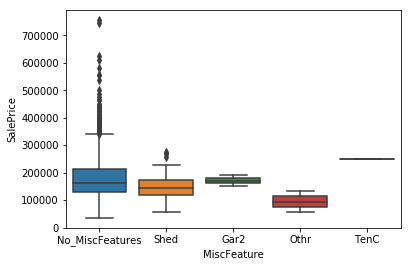

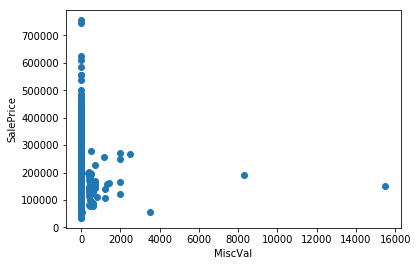

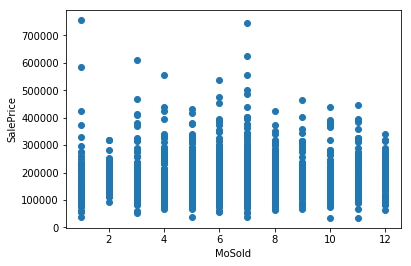

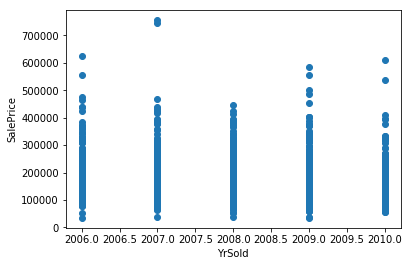

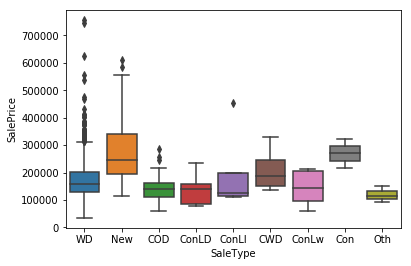

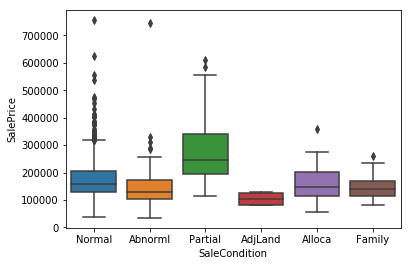

In [137]:
a=0
for col in list(housing.columns.values)[1:len(housing.columns)-1]:
    try:
        if np.issubdtype(housing[col].dtype, np.number) == True:
            matplotlib.pyplot.scatter(housing[col],housing.SalePrice)
        else:
            sns.boxplot(x=col, y="SalePrice", data=housing)
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        plt.show()
    except:
        pass

In [123]:
features = list(housing.columns.values)
#correlations = list(housing.corr(method="pearson")['SalePrice'])
missing = list(housing.apply(lambda x: 1-(x.count()/len(housing)), axis=0))
datatype = housing.dtypes
fc = list(zip(features,zip(missing,datatype)))
fc
features = dict(fc)
#features = pd.DataFrame.from_dict(features)
features
#features

{'Id': (0.0, dtype('int64')),
 'MSSubClass': (0.0, dtype('int64')),
 'MSZoning': (0.0, dtype('O')),
 'LotFrontage': (0.17739726027397262, dtype('float64')),
 'LotArea': (0.0, dtype('int64')),
 'Street': (0.0, dtype('O')),
 'Alley': (0.0, dtype('O')),
 'LotShape': (0.0, dtype('O')),
 'LandContour': (0.0, dtype('O')),
 'Utilities': (0.0, dtype('O')),
 'LotConfig': (0.0, dtype('O')),
 'LandSlope': (0.0, dtype('O')),
 'Neighborhood': (0.0, dtype('O')),
 'Condition1': (0.0, dtype('O')),
 'Condition2': (0.0, dtype('O')),
 'BldgType': (0.0, dtype('O')),
 'HouseStyle': (0.0, dtype('O')),
 'OverallQual': (0.0, dtype('int64')),
 'OverallCond': (0.0, dtype('int64')),
 'YearBuilt': (0.0, dtype('int64')),
 'YearRemodAdd': (0.0, dtype('int64')),
 'RoofStyle': (0.0, dtype('O')),
 'RoofMatl': (0.0, dtype('O')),
 'Exterior1st': (0.0, dtype('O')),
 'Exterior2nd': (0.0, dtype('O')),
 'MasVnrType': (0.005479452054794498, dtype('O')),
 'MasVnrArea': (0.005479452054794498, dtype('float64')),
 'ExterQual': (

In [133]:
features1 = pd.DataFrame.from_dict(features)
features1

import csv
 
myFile = open('test2.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    for key, value in features.items():
        writer.writerow([key, value])



In [125]:
features1.shape

(2, 81)

YrSold  MoSold
2006    1         201090.000000
        2         194322.222222
        3         184982.200000
        4         174312.814815
        5         158928.289474
        6         172283.333333
        7         183211.059701
        8         196239.956522
        9         223768.866667
        10        172356.708333
        11        213285.000000
        12        185545.000000
2007    1         183234.615385
        2         176301.750000
        3         176567.782609
        4         170772.608696
        5         169873.511628
        6         179725.813559
        7         195396.843137
        8         183941.075000
        9         195533.818182
        10        215428.812500
        11        197709.333333
        12        214414.500000
2008    1         178504.692308
        2         159370.000000
        3         178505.277778
        4         159293.346154
        5         188334.473684
        6         169730.941176
        7         174562.

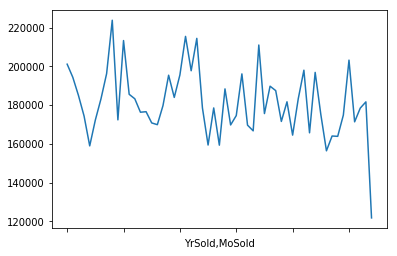

In [149]:
a = housing.groupby(['YrSold','MoSold']).mean()
print(a['SalePrice'])
(a['SalePrice']).plot()


In [126]:
model <- lm(SalePrice ~ ., data = housing)
res <- qplot(fitted(model), resid(model))
res+geom_hline(yintercept=0)

SyntaxError: invalid syntax (<ipython-input-126-d31cef5ef15f>, line 1)

In [ ]:
avPlots(model, id.n=2, id.cex=0.7)

In [138]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_MiscFeatures,0,1,2008,WD,Normal,118000
